# Avocado Analysis: EDA and Time Series Prediction

#### In this article, we will work on Avocado dataset from the Hass Avocado Board (HAB) — a professional avocado research organization in USA.
#### You can access the data here: https://www.kaggle.com/neuromusic/avocado-prices.
#### The  dataset is weekly time series data (168 weeks) from Jan 4, 2015, to Mar 25, 2018. For this period, the dataset provides average price and total volume data for conventional and organic avocados in different regions of USA. 
#### Analysis scope: 
* EDA: (**USA total market, conventional vs. organic**). The data exploring analysis is including comparsion between conventional and organic type, the relation between average price and total volume sold, average price monthly trend and etc.
* SARIMAX Time series prediction model: (**USA total market, AveragePrice of conventional**) use time series predictive model SARIMAX for future average price prediction.


## 1. Imports
**Import numpy, pandas, matplotlib, seaborn, statsmodels, sklearn, and pmdarima. Then set %matplotlib inline**

In [305]:
# load packages
import warnings 
warnings.filterwarnings("ignore")   
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import pmdarima as pm
from sklearn.metrics import r2_score

%matplotlib inline

**Set plot attributes**

In [193]:
# set plot attributes'
matplotlib.rcParams['figure.figsize'] = 12, 6
plt.style.use('seaborn-colorblind')
plt.rc('figure', titlesize=14)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Get the Data

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [194]:
data = pd.read_csv("https://raw.githubusercontent.com/gloria08/avocado_project/master/avocado.csv",
                parse_dates=['Date'], index_col='Date')

**There are 13 variables and 18249 rows in data.**

In [195]:
data.shape

(18249, 13)

In [196]:
data.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [197]:
data.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [199]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## 3. Data Checking and Cleaning

**I continued checking if any null values, any duplicated rows and also checked if any extreme values to be aware of. All good!**

In [200]:
data.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [201]:
data[data.duplicated()]

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,


In [202]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

**Region column contains total USA, regions and cities. This allows you do different analysis by specific cities or regions. I only choose Total US as analysis scope. And only keep type, AveragePrice and Total Volume columns. Year and Month columns are added to do further analysis.**

In [203]:
# keep columns
columns=['type','AveragePrice','Total Volume']
df=data[data['region']=='TotalUS'].loc[:,columns]

#get Year & Month
df['Year'] = df.index.year # add Year column
df['Month'] = df.index.month# add Month column

In [204]:
#sort df by date and type
df=df.reset_index().sort_values(by=['type','Date']).set_index('Date')
df.head()

,type,AveragePrice,Total Volume,Year,Month
Date,,,,,
2015-01-04,conventional,0.95,31324277.73,2015,1
2015-01-11,conventional,1.01,29063542.75,2015,1
2015-01-18,conventional,1.03,29043458.85,2015,1
2015-01-25,conventional,1.04,28470310.84,2015,1
2015-02-01,conventional,0.89,44655461.51,2015,2


**Further explore the data by checking crosstables.**

In [205]:
pd.crosstab(df.index.year, df.index.month, margins = True, margins_name = 'Grand Total')

col_0,1,2,3,4,5,6,7,8,9,10,11,12,Grand Total
row_0,,,,,,,,,,,,,
2015,8,8,10,8,10,8,8,10,8,8,10,8,104
2016,10,8,8,8,10,8,10,8,8,10,8,8,104
2017,10,8,8,10,8,8,10,8,8,10,8,10,106
2018,8,8,8,0,0,0,0,0,0,0,0,0,24
Grand Total,36,32,34,26,28,24,28,26,24,28,26,26,338


**We noticed that 2018 data stops in March.**

In [206]:
date_range=df.index.min().strftime('%Y-%m-%d') +' ~ '+df.index.max().strftime('%Y-%m-%d')
print(date_range)

2015-01-04 ~ 2018-03-25


In [207]:
pd.crosstab(df['type'],[df.index.year,df.index.month], margins = True, margins_name = 'Grand Total')

col_0        2015                                      2016                  \
col_1           1  2   3  4   5  6  7   8  9 10  11 12    1  2  3  4   5  6   
type                                                                          
conventional    4  4   5  4   5  4  4   5  4  4   5  4    5  4  4  4   5  4   
organic         4  4   5  4   5  4  4   5  4  4   5  4    5  4  4  4   5  4   
Grand Total     8  8  10  8  10  8  8  10  8  8  10  8   10  8  8  8  10  8   

col_0                            2017                                       \
col_1          7  8  9  10 11 12    1  2  3   4  5  6   7  8  9  10 11  12   
type                                                                         
conventional   5  4  4   5  4  4    5  4  4   5  4  4   5  4  4   5  4   5   
organic        5  4  4   5  4  4    5  4  4   5  4  4   5  4  4   5  4   5   
Grand Total   10  8  8  10  8  8   10  8  8  10  8  8  10  8  8  10  8  10   

col_0        2018       Grand Total  
col_1           1  2  3              
type                                 
conventional    4  4  4         169  
organic         4  4  4         169  
Grand Total     8  8  8         338

**The dataset is comprised of weekly time series data spanning 168 weeks from January of 2015, to March of 2018.**

**Line plot to check if any strange values.**

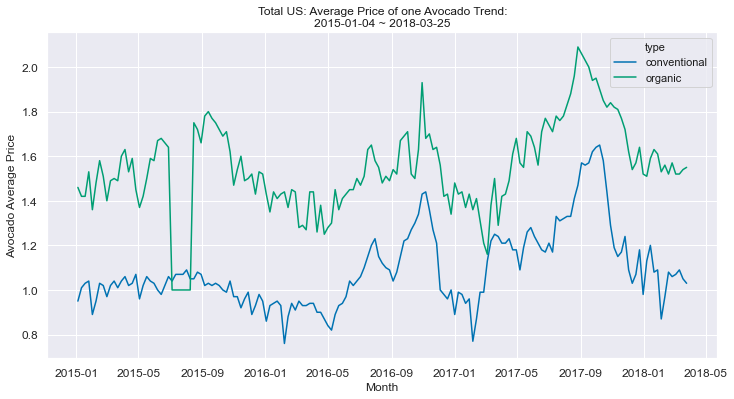

In [208]:
#plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="AveragePrice", hue='type', data=df)
plt.title("Total US: Average Price of one Avocado Trend:\n" +date_range)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

**There is a big dip in the organic trend line at around of July of 2015. The organic avocado is more expensive than conventional type, but it is much lower duiring July of 2015. I believe it is outliers for organic data. So I will replace the values with ffill method.**

In [209]:
df.loc[(df['type']=='organic') & (df['AveragePrice']==1) , 'AveragePrice']=np.nan
df=df.fillna(method='ffill')

**Recheck the chart. fixed**

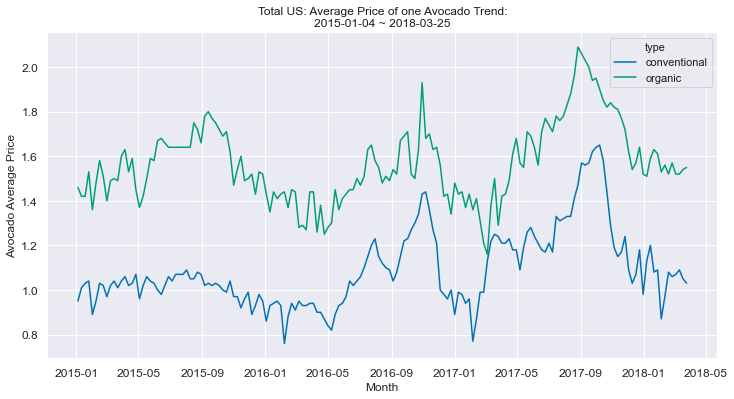

In [210]:
sns.lineplot(x=df.index, y="AveragePrice", hue='type', data=df)
plt.title("Total US: Average Price of one Avocado Trend:\n" +date_range)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

**Also prepare for organic and conventional data for further analysis.**

In [211]:
org=df[df['type']=='organic']
con=df[df['type']=='conventional']

## 4. Exploratory Data Analysis (EDA)
**Organic avocados are generally more expensive than conventional type.**

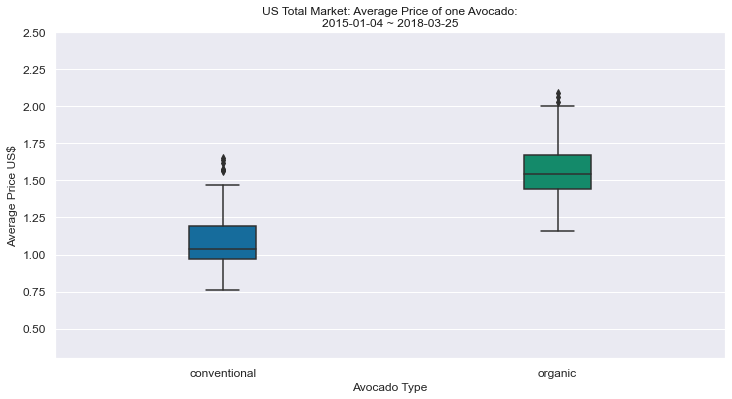

In [212]:
sns.boxplot(x="type", 
            y="AveragePrice", 
            data=df,
            width=0.2)
plt.ylim(0.3,2.5)
plt.title("US Total Market: Average Price of one Avocado:\n" +date_range)
plt.xlabel("Avocado Type")
plt.ylabel('Average Price US$')
plt.show()

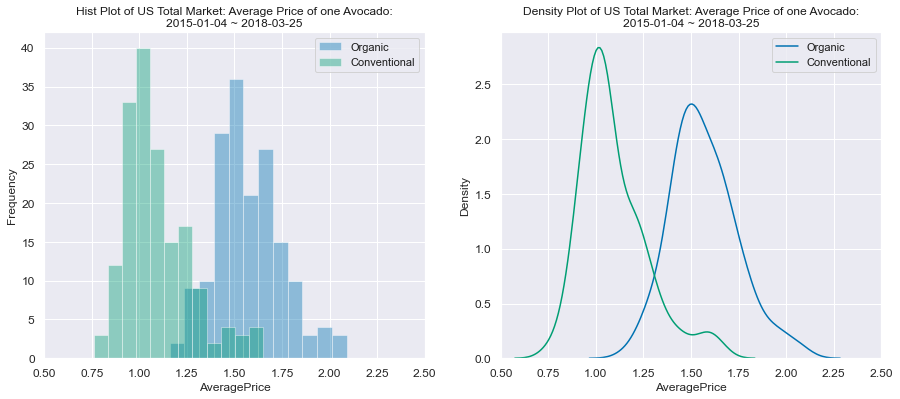

In [213]:

fig, axarr = plt.subplots(1, 2, figsize=(15, 6))
axarr[0].title.set_text('Hist Plot of US Total Market: Average Price of one Avocado:\n' +date_range)

# hist plot
sns.distplot(org['AveragePrice'],  
             kde = False, 
             label='Organic',
             ax=axarr[0])
sns.distplot(con['AveragePrice'],  
             kde = False, 
             label='Conventional', 
             ax=axarr[0])
axarr[0].legend()
axarr[0].set_ylabel('Frequency')
axarr[0].set_xlim([0.5, 2.5])

# density plot
axarr[1].title.set_text('Density Plot of US Total Market: Average Price of one Avocado:\n' +date_range)

sns.distplot(org['AveragePrice'], 
             hist=False, 
             kde = True, 
             label='Organic',
             ax=axarr[1])
sns.distplot(con['AveragePrice'],  
             hist=False, 
             kde = True, 
             label='Conventional', 
             ax=axarr[1])
axarr[1].legend()
axarr[1].set_ylabel('Density')
axarr[1].set_xlim([0.5, 2.5])
plt.show()

**Digging into the numbers, conventional avocados' average price is USD 1.09. Meanwhile, organic avocados cost on $1.57 on average.**

In [215]:
df[['AveragePrice','type']].groupby('type').agg(['median','mean','std','min','max'])

AveragePrice                                
                   median      mean       std   min   max
type                                                     
conventional         1.04  1.092012  0.174119  0.76  1.65
organic              1.54  1.568757  0.173957  1.16  2.09

In [216]:
df[['AveragePrice','type']].groupby('type').agg(['median','mean','std','min','max'])

AveragePrice                                
                   median      mean       std   min   max
type                                                     
conventional         1.04  1.092012  0.174119  0.76  1.65
organic              1.54  1.568757  0.173957  1.16  2.09

**As shown in below chart, there are clear seasonal trends in avocado average price. Sep and Oct, avocado average price for both types tend to be highest.**

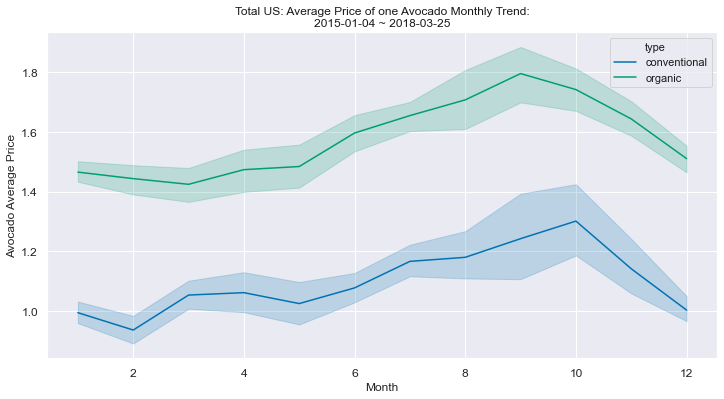

In [218]:
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.title("Total US: Average Price of one Avocado Monthly Trend:\n" +date_range)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

**Looking at total volume sold, however, shows that organic avocados only constitute about 2.8% of all avocados sold in the US.**

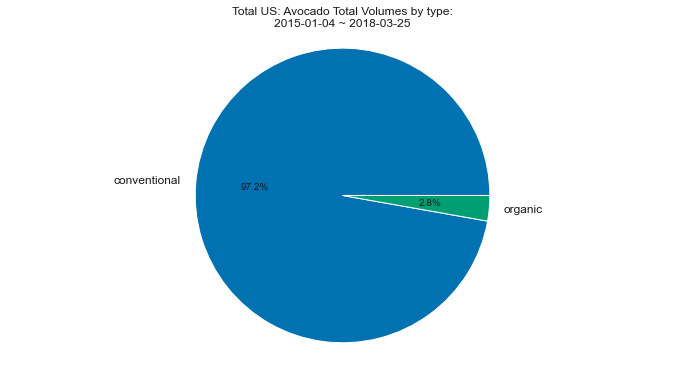

In [239]:
df_pct = (df.groupby(['type'])['Total Volume'].sum()/df['Total Volume'].sum())
labels = ['conventional', 'organic']

fig1, ax1 = plt.subplots()
ax1.pie(df_pct, labels=labels,autopct='%1.1f%%',
         startangle=360)
ax1.axis('equal')  
plt.title("Total US: Avocado Total Volumes by type:\n" +date_range)

plt.show()

**Conventional were sold 33.7 million on average during this period. Howwever, organic's total volume sold is under one million.**

In [224]:
df['Total Volume: Million']=df['Total Volume']/1000000

df[['Total Volume: Million','type']].groupby('type').agg(['median','mean','std','min','max'])

Total Volume: Million                                           
                            median       mean       std        min        max
type                                                                         
conventional             32.994014  33.735039  6.118092  21.009730  62.505647
organic                   0.967886   0.967566  0.302482   0.501815   1.814930

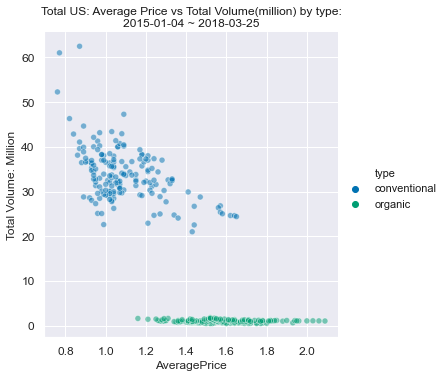

In [220]:
sns.relplot(x="AveragePrice", y="Total Volume: Million", 
            hue="type", 
            alpha=.5, 
            data=df)
plt.title("Total US: Average Price vs Total Volume(million) by type:\n" +date_range)

plt.show()

**From 2015 to 2017, avocado average price appears to be gradually increasing.**

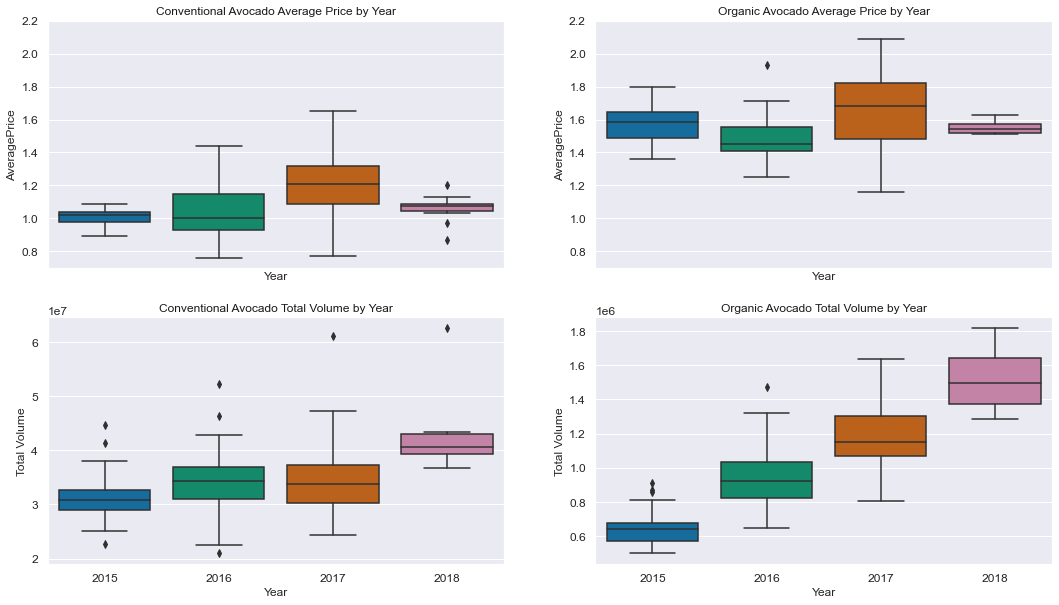

In [265]:

fig, a = plt.subplots(2, 2, figsize=(18,10),sharex=True)
sns.boxplot(data=con, x='Year', y='AveragePrice', ax=a[0][0])
a[0][0].set_title('Conventional Avocado Average Price by Year')
a[0][0].set_ylim(0.7, 2.2)

sns.boxplot(data=org, x='Year', y='AveragePrice', ax=a[0][1])
a[0][1].set_title('Organic Avocado Average Price by Year')
a[0][1].set_ylim(0.7, 2.2)

sns.boxplot(data=con, x='Year', y='Total Volume', ax=a[1][0])
a[1][0].set_title('Conventional Avocado Total Volume by Year')
#a[1][0].set_ylim(0, 7e7)

sns.boxplot(data=org, x='Year', y='Total Volume', ax=a[1][1])
a[1][1].set_title('Organic Avocado Total Volume by Year')
#a[1][1].set_ylim(0, 7e7)

plt.show()


**There are some exceptions to this. In March of 2017, there was a period of time where the conventional and organic avocado prices were similar. 
This also shows there was a huge seasonal hike in prices after Augest of 2017 and before Jan 2018.**

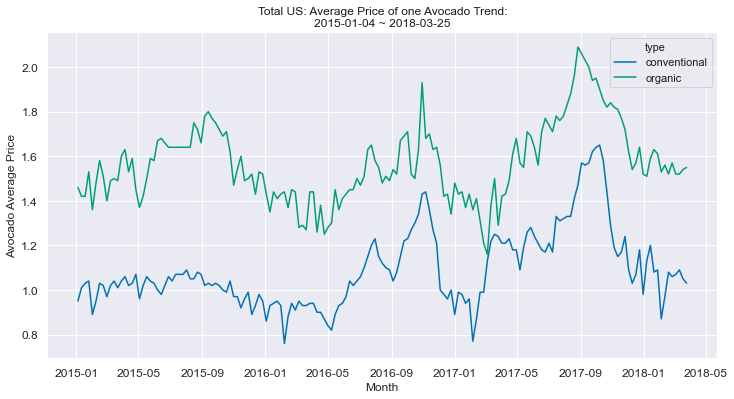

In [289]:
sns.lineplot(x=df.index, y="AveragePrice", hue='type', data=df)
plt.title("Total US: Average Price of one Avocado Trend:\n" +date_range)
plt.xlabel('Month')
plt.ylabel('Avocado Average Price')
plt.show()

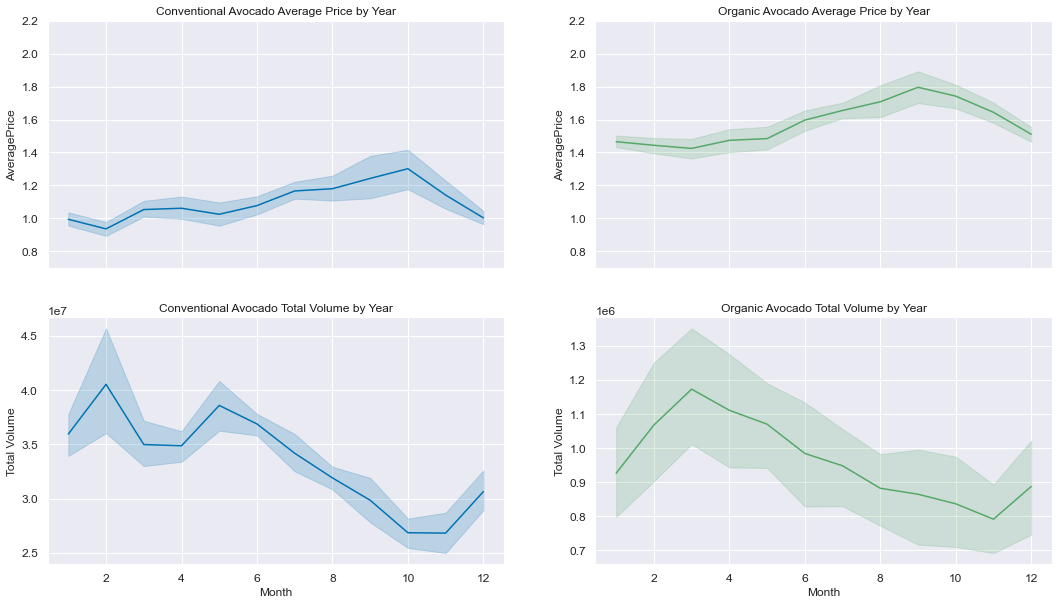

In [269]:
fig, a = plt.subplots(2, 2, figsize=(18,10),sharex=True)
sns.lineplot(data=con, x='Month', y='AveragePrice', ax=a[0][0])
a[0][0].set_title('Conventional Avocado Average Price by Year')
a[0][0].set_ylim(0.7, 2.2)

sns.lineplot(data=org, x='Month', y='AveragePrice', ax=a[0][1], color='g')
a[0][1].set_title('Organic Avocado Average Price by Year')
a[0][1].set_ylim(0.7, 2.2)

sns.lineplot(data=con, x='Month', y='Total Volume', ax=a[1][0])
a[1][0].set_title('Conventional Avocado Total Volume by Year')
#a[1][0].set_ylim(0, 7e7)

sns.lineplot(data=org, x='Month', y='Total Volume', ax=a[1][1], color='g')
a[1][1].set_title('Organic Avocado Total Volume by Year')
#a[1][1].set_ylim(0, 7e7)

plt.show()

In [42]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr_Organic, _ = pearsonr(org['AveragePrice'], org['Total Volume'])
print('Organic correlation: %.3f' % corr_Organic)
corr_Con, _ = pearsonr(con['AveragePrice'], con['Total Volume'])
print('Con correlation: %.3f' % corr_Con)

Organic correlation: -0.123
Con correlation: -0.510


**From below charts, we can also see that conventional type showed a moderate negative correlation between total volume sold and average prices and  This shows that price decreases when quantity sold increases.**

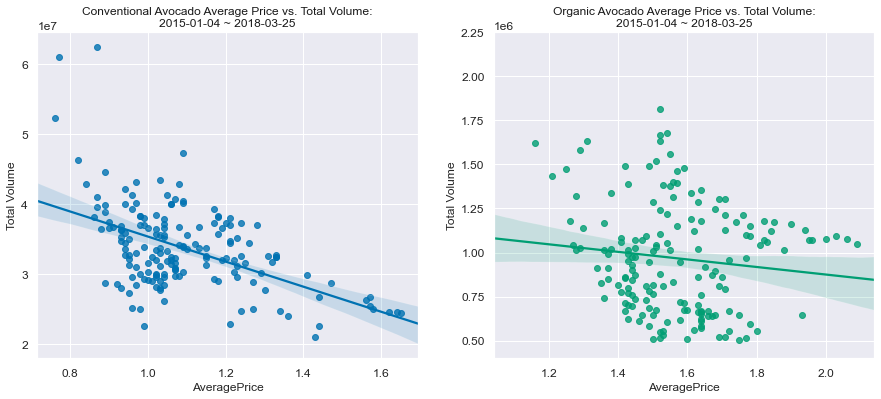

In [288]:
fig, a = plt.subplots(1, 2, figsize=(15,6))

sns.regplot(x="AveragePrice", y="Total Volume", data=con, ax=a[0])
a[0].set_title("Conventional Avocado Average Price vs. Total Volume:\n" +date_range)

sns.regplot(x="AveragePrice", y="Total Volume", data=org, ax=a[1])
a[1].set_title("Organic Avocado Average Price vs. Total Volume:\n" +date_range)
a[1].set_ylim(400000, 2250000)
plt.show()

**However, organic avocados' total volume sold had very low correlation with average price. This shows that even total volumes increases, the average price would not decrease accordingly.**

## 5. Time Series Modeling (SARIMAX) and Prediction

**In this secton, I only choose conventional avocado to do the time series modelong and forecast.**

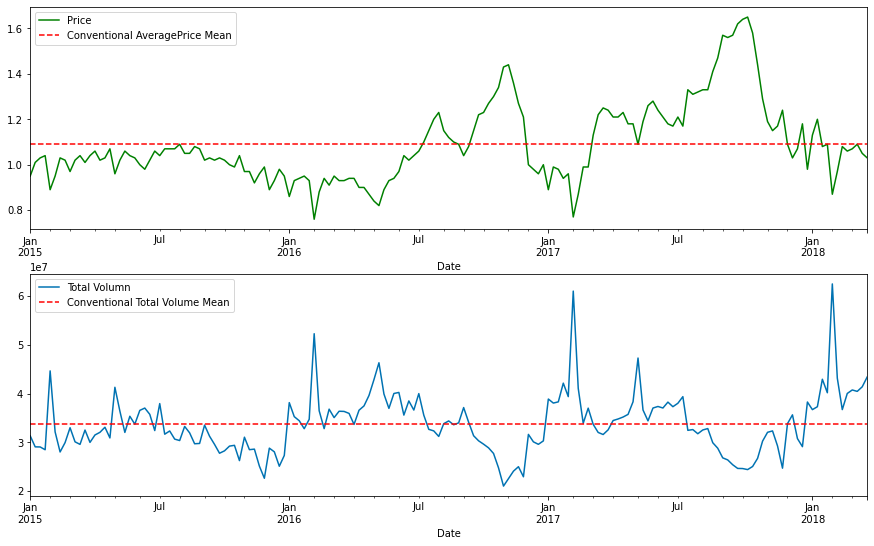

In [37]:
fig, axes = plt.subplots(nrows=2,ncols=1)

f1= con['AveragePrice'].plot(ax=axes[0],label='Price', color='green',figsize=(15, 9))
l1=axes[0].axhline(con.mean()[0],color='red',ls='--')
l1.set_label('Conventional AveragePrice Mean')

axes[0].legend(loc='best')

f2= con['Total Volume'].plot(ax=axes[1],label='Total Volumn',figsize=(15, 9))

l2=axes[1].axhline(con.mean()[1],color='red',ls='--')

l2.set_label('Conventional Total Volume Mean')

axes[1].legend(loc='best')


plt.show()

### 5.1 Decompose
**We use statsmodel for seasonal decompose as an additive model and the frequency of the time series which is the periodicity of the data which is 52 weeks for an yearly data.**

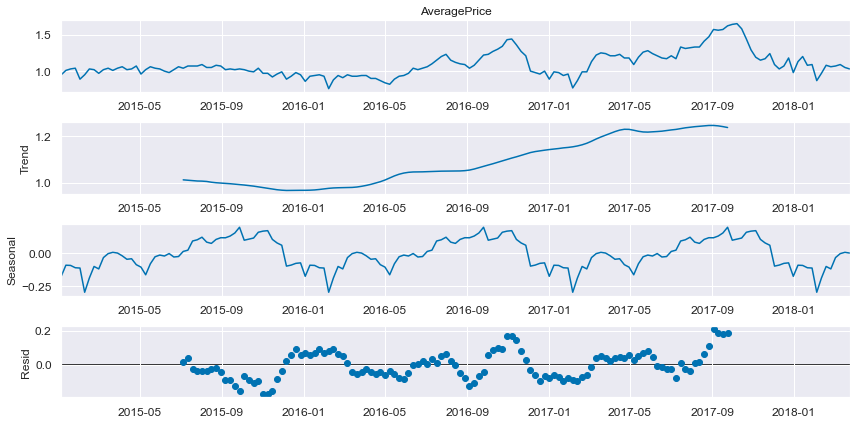

In [290]:
# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(con.AveragePrice, model='additive',freq=52)
decomposition.plot()
plt.show()

**The decomposition plot indicates that the conventional avocado average price has an increasing trend and seasonal pattern.**

In [ ]:
con[['AveragePrice']].shape

In [45]:
169*0.8

135.20000000000002

### 5.2  Split the data into train and test data.

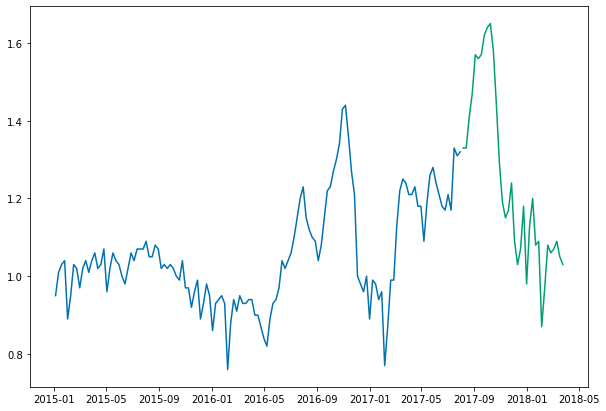

In [46]:
train = con[:135]
test = con[135:]
plt.plot(train.AveragePrice)
plt.plot(test.AveragePrice)


### 5.3  Check for Data Stationarity using Augmented Dickey Fuller(ADF) test**


In [292]:
result = adfuller(train['AveragePrice']
                  ,regression='ct')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('p-value:', result[4])

ADF Statistic: -2.778549799142381
p-value: 0.20493439755497683
p-value: {'1%': -4.027969407257541, '5%': -3.443776267094024, '10%': -3.1465734136180314}


**So, in our case, P Value > 0.05. It fails to reject the null hypothesis and the data is non stationary. we go ahead with finding the order of differencing.**

In [293]:
con_stationary= train['AveragePrice'].diff().diff(52).dropna()

result = adfuller(con_stationary)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('p-value:', result[4])

ADF Statistic: -5.37062094115726
p-value: 3.903227710465427e-06
p-value: {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625}


**p-value is less than 0.05, so can reject null hypothesis so AveragePrice is stationary after differencing.**

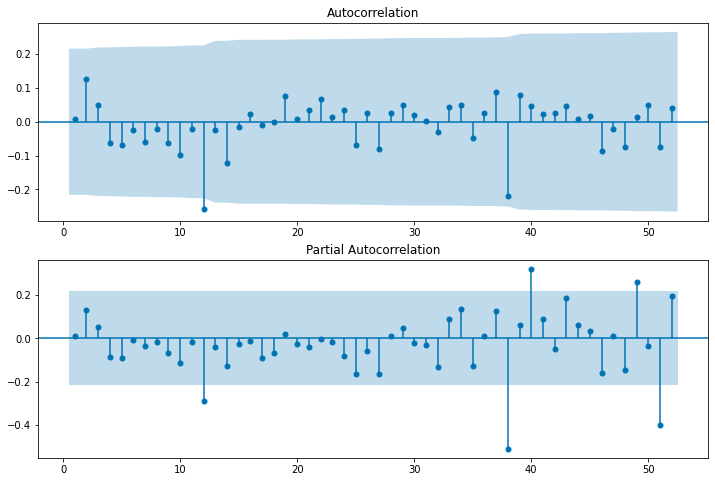

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
# Make ACF plot
plot_acf(con_stationary, lags=52, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(con_stationary, lags=52, zero=False, ax=ax2)
plt.show()

### 5.4  Explaining the parameters from auto_arima
**We will use Python’s pmdarima library, to automatically extract the best parameters for our Seasonal ARIMA model. Inside auto_arima function, we will specify  D=1 as we differentiate once for the trend and once for seasonality, m=52 because we have weekly data, and trend='CT'to include constant and seasonal=True to fit a seasonal-ARIMA. Besides, we specify trace=True to print status on the fits. This helps us to determine the best parameters by comparing the AIC scores.**

In [295]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(train[['AveragePrice']], 
                        exog=train[['Total Volume']],
                        start_p=1, start_q=1,
                        #test='adf',
                        max_p=2, max_q=2, m=52,
                        start_P=0, seasonal=True,
                        d=0, D=1, 
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True,
                       trend='ct')

sxmodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=-218.339, Time=32.25 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=-105.890, Time=3.52 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=-221.008, Time=26.53 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=-166.289, Time=36.31 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=-105.890, Time=4.02 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=-223.003, Time=2.88 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=-221.005, Time=25.14 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=-219.010, Time=27.15 sec
 ARIMA(2,0,0)(0,1,0)[52] intercept   : AIC=-221.577, Time=6.16 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=-220.337, Time=3.19 sec
 ARIMA(0,0,1)(0,1,0)[52] intercept   : AIC=-166.448, Time=5.46 sec
 ARIMA(2,0,1)(0,1,0)[52] intercept   : AIC=-179.603, Time=4.91 sec
 ARIMA(1,0,0)(0,1,0)[52]             : AIC=-223.003, Time=2.11 sec

Best model:  ARIMA(1,0,0)(0,1,0)[52]          
Total fit time: 179.631 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  135
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                 115.502
Date:                            Thu, 27 Aug 2020   AIC                           -223.003
Time:                                    00:08:58   BIC                           -213.328
Sample:                                         0   HQIC                          -219.116
                                            - 135                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0180      0.028     -0.638      0.524      -0.073       0.037
drift          0.0003      0.000      0.933      0.351      -0.000       0.001
ar.L1          0.8896      0.055     16.110      0.000       0.781       0.998
sigma2         0.0038      0.001      7.623      0.000       0.003       0.005
===================================================================================
Ljung-Box (Q):                       27.72   Jarque-Bera (JB):                12.58
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.30
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 5.5 Build the model
**As suggested by auto_arima we will use SARIMAX to train our data. ARIMA(1,0,0)(0,1,0)52**

In [296]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train[['AveragePrice']], 
                #exogenous=train[['Total Volume']],
                order=(1,0,0),  
                seasonal_order=(0,1,0,52), 
                trend='ct',
                enforce_invertibility=False)
results = model.fit()  
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       AveragePrice   No. Observations:                  135
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                 115.502
Date:                            Thu, 27 Aug 2020   AIC                           -223.003
Time:                                    00:13:20   BIC                           -213.328
Sample:                                01-04-2015   HQIC                          -219.116
                                     - 07-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0180      0.028     -0.638      0.524      -0.073       0.037
drift          0.0003      0.000      0.933      0.351      -0.000       0.001
ar.L1          0.8896      0.055     16.110      0.000       0.781       0.998
sigma2         0.0038      0.001      7.623      0.000       0.003       0.005
===================================================================================
Ljung-Box (Q):                       27.72   Jarque-Bera (JB):                12.58
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.30
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

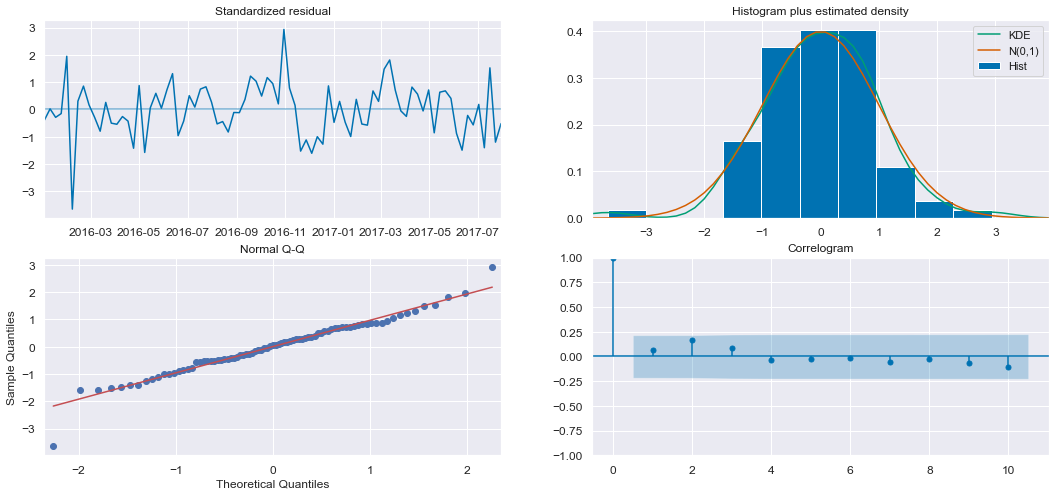

In [297]:
results.plot_diagnostics(figsize=(18,8))
plt.show()

**The top-left plot shows the residuals over time and it appears to be a white noise with no seasonal component. The top-right plot shows that kde line (in red) closely follows the N(0,1) line, which is the standard notation of normal distribution with zero mean and standard deviation of 1, suggesting the residuals are normally distributed. The bottom-left normal gg-plot shows ordered distribution of residuals (in blue) closely follow the linear trend of the samples taken from a standard normal distribution, suggesting residuals are normally distributed. The bottom-right is a correlogram plot indicating residuals have a low correlation with lagged versions.**

In [298]:
#To measure the accuracy of forecasts, we compare the prediction values on the test set with its real values.
forecast_object = results.get_forecast(steps=len((test)))
pred = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = pred.index

### 5.6 Predict the results

In [299]:
dates

DatetimeIndex(['2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27',
               '2017-09-03', '2017-09-10', '2017-09-17', '2017-09-24',
               '2017-10-01', '2017-10-08', '2017-10-15', '2017-10-22',
               '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17',
               '2017-12-24', '2017-12-31', '2018-01-07', '2018-01-14',
               '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11',
               '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
               '2018-03-18', '2018-03-25'],
              dtype='datetime64[ns]', freq='W-SUN')

In [300]:
forecast_object = results.get_forecast(steps=len(test))
forecast_object

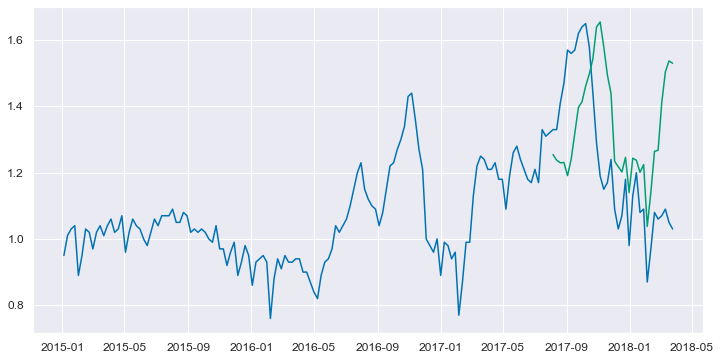

In [301]:
plt.plot(con['AveragePrice'])
plt.plot(pred)
plt.show()

In [302]:
# Create forecast object
forecast_object = results.get_forecast(100)

# Extract predicted mean attribute
prediction = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = prediction.index

In [306]:
score = r2_score(test['AveragePrice'], pred)
score

-0.35717094020511686

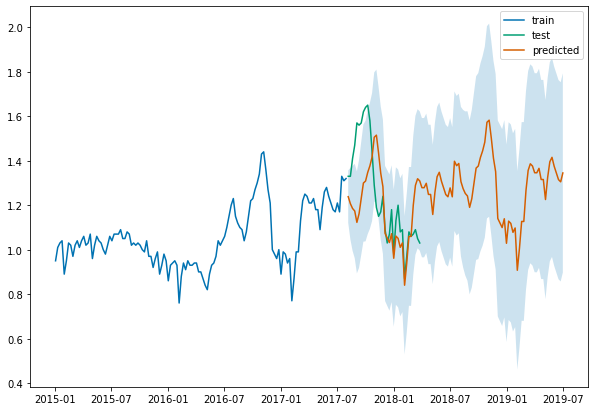

In [239]:
plt.figure()

# Plot past CO2 levels
plt.plot(train.index, train['AveragePrice'], label='train')
plt.plot(test.index, test['AveragePrice'], label='test')


# Plot the prediction means as line
plt.plot(dates, prediction, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()
